# Comparison of genetic variant frequencies: Africans vs Asians/Europeans

This analysis aimed to answer the following research questions: 

**1. How do frequencies of variants in the studied genes among Africans compare with those of Europeans/Asians?**
 
**2. Have any of the genetic variants identified in Africans been previously linked to HIE, and if so, do these variants exhibit significantly different frequencies in Africans compared to the populations studied in HIE research?**

To achieve this, the following steps were performed: 

1. In-house Data Generation: In-house genetic variant allele count data on African populations was generated from genetic information obtained from the [GnomAD 1000 Genomes and HGDP datasets](https://gnomad.broadinstitute.org/news/2021-10-gnomad-v3-1-2-minor-release/). This data was prepared for analysis by following the steps outlined in the [Notebooks\Data_preparation\2-IH_allele_counts.ipynb](https://github.com/MeganHolborn/Genetic_data_analysis/blob/main/Notebooks/Data_preparation/2-IH_allele_counts.ipynb) Jupyter notebook. The prepared data is stored [here](https://github.com/MeganHolborn/Genetic_data_analysis/blob/main/Data/Processed/IH_allele_counts_fishers.csv).
2. ALFA Data Retrieval: Variant allele count data on other global populations was retrieved from the [NCBI ALFA database](https://www.ncbi.nlm.nih.gov/snp/docs/gsr/alfa/). This data was prepared for analysis by following the steps outlined in the  [Notebooks\Data_preparation\3-ALFA_allele_counts_a.ipynb](https://github.com/MeganHolborn/Genetic_data_analysis/blob/main/Notebooks/Data_preparation/3-ALFA_allele_counts_a.ipynb) and [Notebooks\Data_preparation\3-ALFA_allele_counts_b.ipynb](https://github.com/MeganHolborn/Genetic_data_analysis/blob/main/Notebooks/Data_preparation/4-ALFA_allele_counts_b.ipynb) notebooks. The prepared data is stored [here](https://github.com/MeganHolborn/Genetic_data_analysis/blob/main/Data/Processed/ALFA_allele_counts_b.csv).
3. Research Question 1 Analysis and Visualisation:
    * In-house variant frequency data for African populations, and ALFA frequency data on global populations were combined into a unified data frame for subsequent analysis. 
    * Scatterplots were generated to visually compare allele frequency correlations between genetic variants in African populations and those in Europeans/Asians. 
    * The degree of correlation between frequency values was measured by calculating the concordance correlation coefficient for respective population pairs under comparison. 
    * Significant differences in frequency between Africans and Europeans/Asians were measured using two-tailed Fisher’s Exact Tests with correction for multiple testing using the Bonferroni method. 
    * Additional allele frequency comparisons between the in-house and ALFA African frequencies were also conducted to assess in-house data quality.
4. Research Question 2 Analysis and Visualisation:
    * HIE variants within both the in-house African and ALFA global variant frequency datasets were identified. 
    * To visually compare the variant allele frequencies for HIE variants among Africans, Europeans and Asians, a heatmap was constructed. 
    * Significant differences in frequency for HIE variants between Africans and Europeans/Asians were determined using a two-tailed Fisher's Exact Test with multiple testing correction using the Bonferroni method. 


## Imports

Notebook setup

In [134]:
import os
import sys

from dotenv import load_dotenv

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import Utils.constants as constants
import Utils.functions as functions

pd.options.mode.chained_assignment = None

Import in-house variant allele count data

In [135]:
ih_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "IH_allele_counts_fishers.csv",
    )
)

ih_data.head(5)

,VAR_NAME,ID,REF,ALT,GENE,POS,ALT_CT_IH_CA,ALT_CT_IH_EA,ALT_CT_IH_Recent African,ALT_CT_IH_SA,ALT_CT_IH_WA,REF_CT_IH_CA,REF_CT_IH_EA,REF_CT_IH_Recent African,REF_CT_IH_SA,REF_CT_IH_WA
0,chr11:34438836T-C,34438836_T_C,T,C,CAT,34438836,0,1,1,0,0,68,203,1219,28,920
1,chr11:34438889G-C,34438889_G_C,G,C,CAT,34438889,0,0,1,1,0,68,204,1219,27,920
2,chr11:34438910C-T,34438910_C_T,C,T,CAT,34438910,0,0,0,0,0,68,204,1220,28,920
3,chr11:34439179A-G,34439179_A_G,A,G,CAT,34439179,0,0,0,0,0,68,204,1220,28,920
4,chr11:34439188C-G,34439188_C_G,C,G,CAT,34439188,0,0,0,0,0,68,204,1220,28,920


Import ALFA variant allele count data

In [136]:
alfa_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "ALFA_allele_counts_b.csv",
    )
)

alfa_data.head(5)

,variant_id,reference_allele,alternate_allele,ALT_CT_ALFA_East Asian,ALT_CT_ALFA_European,ALT_CT_ALFA_Latin American 1,ALT_CT_ALFA_Latin American 2,ALT_CT_ALFA_South Asian,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_Latin American 1,REF_CT_ALFA_Latin American 2,REF_CT_ALFA_South Asian
0,rs1000343,C,T,0.0,49.0,5.0,10.0,0.0,490.0,109377.0,673.0,2200.0,184.0
1,rs1000989,T,C,55.0,21489.0,123.0,1330.0,1685.0,109.0,37269.0,273.0,2052.0,3283.0
2,rs1000990,T,C,32.0,5355.0,40.0,261.0,36.0,54.0,8931.0,106.0,349.0,62.0
3,rs1005573,C,T,35.0,10693.0,209.0,1810.0,79.0,69.0,4955.0,87.0,956.0,31.0
4,rs1007311,A,G,56.0,9154.0,61.0,154.0,43.0,56.0,11242.0,85.0,456.0,55.0


## Analysis and Visualisation

### Data integration
Combine variant allele count data generated in-house and the data fetched from ALFA into a unified dataframe for analysis.

Filter in-house data for variants with rsIDs. ALFA data is only available for variants with rsIDs.

In [137]:
ih_data_rsids = ih_data[ih_data.VAR_NAME.str.contains("rs")]

Merge in-house and ALFA variant count data

In [138]:
ih_alfa_data = ih_data_rsids.merge(
    alfa_data,
    how="left",
    left_on=["VAR_NAME", "REF", "ALT"],
    right_on=["variant_id", "reference_allele", "alternate_allele"],
).drop(columns=["variant_id", "reference_allele", "alternate_allele"])

ih_alfa_data.head(5)

,VAR_NAME,ID,REF,ALT,GENE,POS,ALT_CT_IH_CA,ALT_CT_IH_EA,ALT_CT_IH_Recent African,ALT_CT_IH_SA,...,ALT_CT_ALFA_East Asian,ALT_CT_ALFA_European,ALT_CT_ALFA_Latin American 1,ALT_CT_ALFA_Latin American 2,ALT_CT_ALFA_South Asian,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_Latin American 1,REF_CT_ALFA_Latin American 2,REF_CT_ALFA_South Asian
0,rs1000343,34452510_C_T,C,T,CAT,34452510,1,9,95,1,...,0.0,49.0,5.0,10.0,0.0,490.0,109377.0,673.0,2200.0,184.0
1,rs1000989,110174956_T_C,T,C,COL4A1,110174956,25,35,320,12,...,55.0,21489.0,123.0,1330.0,1685.0,109.0,37269.0,273.0,2052.0,3283.0
2,rs1000990,110174971_T_C,T,C,COL4A1,110174971,25,35,317,8,...,32.0,5355.0,40.0,261.0,36.0,54.0,8931.0,106.0,349.0,62.0
3,rs1005573,33026408_C_T,C,T,OLIG2,33026408,60,173,1061,28,...,35.0,10693.0,209.0,1810.0,79.0,69.0,4955.0,87.0,956.0,31.0
4,rs1007311,150998920_A_G,A,G,NOS3,150998920,21,128,691,10,...,56.0,9154.0,61.0,154.0,43.0,56.0,11242.0,85.0,456.0,55.0


### Calculate variant allele frequencies

The alternate allele frequency for a variant can be calculated by dividing the alternate allele count of a variant for a specific population group by the sum of the alternate and reference allele counts. 

In [139]:
ih_alfa_frequencies = pd.DataFrame()

# Get details on variant IDs, names and the associated gene

ih_alfa_frequencies["ID"] = ih_alfa_data["ID"]

ih_alfa_frequencies["VAR_NAME"] = ih_alfa_data["VAR_NAME"]

ih_alfa_frequencies["POS"] = ih_alfa_data["POS"]

ih_alfa_frequencies["REF"] = ih_alfa_data["REF"]

ih_alfa_frequencies["ALT"] = ih_alfa_data["ALT"]

ih_alfa_frequencies["GENE"] = ih_alfa_data["GENE"]

# Calculate frequencies

ih_alfa_frequencies["IH_Recent African_ALT_AF"] = ih_alfa_data[
    "ALT_CT_IH_Recent African"
] / (
    ih_alfa_data["ALT_CT_IH_Recent African"]
    + ih_alfa_data["REF_CT_IH_Recent African"]
)
ih_alfa_frequencies["ALFA_Latin American 1_ALT_AF"] = ih_alfa_data[
    "ALT_CT_ALFA_Latin American 1"
] / (
    ih_alfa_data["ALT_CT_ALFA_Latin American 1"]
    + ih_alfa_data["REF_CT_ALFA_Latin American 1"]
)
ih_alfa_frequencies["ALFA_Latin American 2_ALT_AF"] = ih_alfa_data[
    "ALT_CT_ALFA_Latin American 2"
] / (
    ih_alfa_data["ALT_CT_ALFA_Latin American 2"]
    + ih_alfa_data["REF_CT_ALFA_Latin American 2"]
)
ih_alfa_frequencies["ALFA_East Asian_ALT_AF"] = ih_alfa_data[
    "ALT_CT_ALFA_East Asian"
] / (ih_alfa_data["ALT_CT_ALFA_East Asian"] + ih_alfa_data["REF_CT_ALFA_East Asian"])
ih_alfa_frequencies["ALFA_South Asian_ALT_AF"] = ih_alfa_data[
    "ALT_CT_ALFA_South Asian"
] / (ih_alfa_data["ALT_CT_ALFA_South Asian"] + ih_alfa_data["REF_CT_ALFA_South Asian"])
ih_alfa_frequencies["ALFA_European_ALT_AF"] = ih_alfa_data["ALT_CT_ALFA_European"] / (
    ih_alfa_data["ALT_CT_ALFA_European"] + ih_alfa_data["REF_CT_ALFA_European"]
)

ih_alfa_frequencies.head(5)

,ID,VAR_NAME,POS,REF,ALT,GENE,IH_Recent African_ALT_AF,ALFA_Latin American 1_ALT_AF,ALFA_Latin American 2_ALT_AF,ALFA_East Asian_ALT_AF,ALFA_South Asian_ALT_AF,ALFA_European_ALT_AF
0,34452510_C_T,rs1000343,34452510,C,T,CAT,0.077869,0.007375,0.004525,0.000000,0.000000,0.000448
1,110174956_T_C,rs1000989,110174956,T,C,COL4A1,0.262295,0.310606,0.393258,0.335366,0.339171,0.365720
2,110174971_T_C,rs1000990,110174971,T,C,COL4A1,0.259836,0.273973,0.427869,0.372093,0.367347,0.374843
3,33026408_C_T,rs1005573,33026408,C,T,OLIG2,0.869672,0.706081,0.654375,0.336538,0.718182,0.683346
4,150998920_A_G,rs1007311,150998920,A,G,NOS3,0.566393,0.417808,0.252459,0.500000,0.438776,0.448813


How many variants are present at this stage of the analysis? 

In [140]:
ih_alfa_frequencies[(ih_alfa_frequencies["IH_Recent African_ALT_AF"] != 0)].ID.nunique()

6393

Remove rows with alt allele frequencies of 0. We only want to include variants that are present in all comparison populations.

In [141]:
ih_alfa_frequencies = ih_alfa_frequencies[
    (ih_alfa_frequencies["IH_Recent African_ALT_AF"] != 0)
    & (ih_alfa_frequencies["ALFA_Latin American 1_ALT_AF"] != 0)
    & (ih_alfa_frequencies["ALFA_Latin American 2_ALT_AF"] != 0)
    & (ih_alfa_frequencies["ALFA_European_ALT_AF"] != 0)
    & (ih_alfa_frequencies["ALFA_East Asian_ALT_AF"] != 0)
    & (ih_alfa_frequencies["ALFA_South Asian_ALT_AF"] != 0)
]

How many variants are present in all the populations?

In [142]:
ih_alfa_frequencies.ID.nunique()

2056

### Visualise the variant frequency correlation between Africans, Asians, Europeans and Latin Americans

Set plot parameters

In [143]:
sns.set(rc={"figure.figsize": (10, 7)})  # set plot size

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

Compare the variant allele frequencies for the Recent African population to that of the ALFA East Asian, South Asian and European populations using a scatter plot. To see how the African data generated in-house compares to that from ALFA, compare the African data generated in-house to the ALFA African Others data. The ALFA African Others data also excludes African American and Caribbean populations.

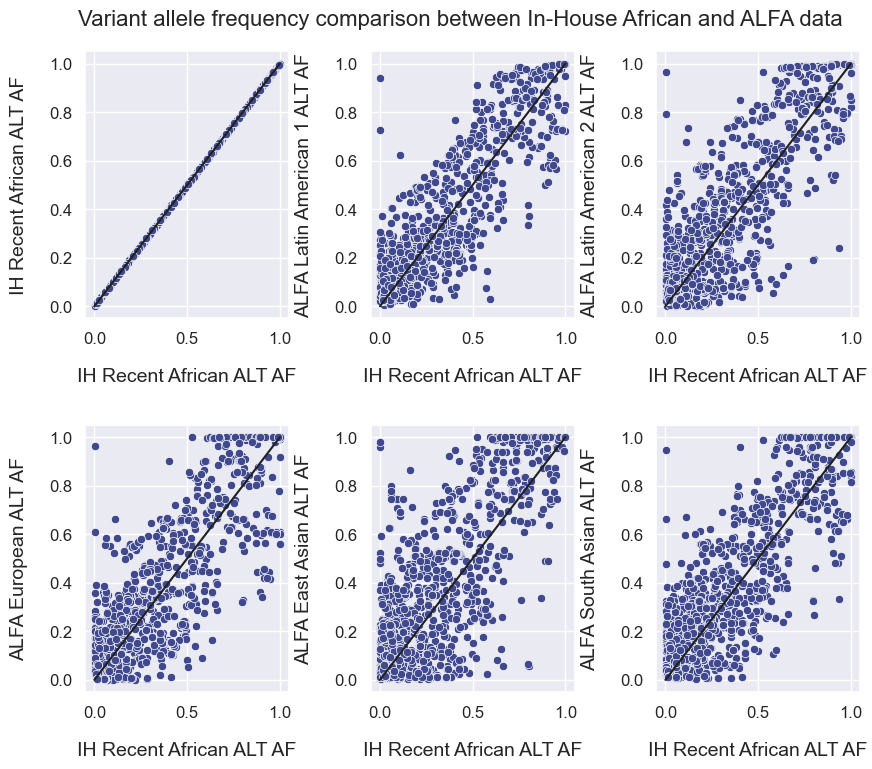

In [144]:
comparison_populations = [
    ["IH_Recent African_ALT_AF", "IH_Recent African_ALT_AF"],
    ["IH_Recent African_ALT_AF", "ALFA_Latin American 1_ALT_AF"],
    ["IH_Recent African_ALT_AF", "ALFA_Latin American 2_ALT_AF"],
    ["IH_Recent African_ALT_AF", "ALFA_European_ALT_AF"],
    ["IH_Recent African_ALT_AF", "ALFA_East Asian_ALT_AF"],
    ["IH_Recent African_ALT_AF", "ALFA_South Asian_ALT_AF"],
]

# Create figure with subplots

fig, axes = plt.subplots(2, 3)

# Adjust subplot parameters

plt.subplots_adjust(
    left=0.125, bottom=0.005, right=0.9, top=0.92, wspace=0.4, hspace=0.4
)

# Set title for figure
plt.suptitle(
    "Variant allele frequency comparison between In-House African and ALFA data",
    size=constants.LARGEST_FONT,
)

for ax, pair in zip(axes.ravel(), comparison_populations):
    # Create a scatter plot with an identity line comparing the non-imputed in-house data to that of the alfa. Annotate the plot with the concordance correlation coefficients of the data
    sns.scatterplot(
        data=ih_alfa_frequencies,
        x=ih_alfa_frequencies[pair[0]],
        y=ih_alfa_frequencies[pair[1]],
        color="#40498E",
        ax=ax,
    )
    ax.plot([0, 1], [0, 1], color="#202020")

    # Set x and y labels for each subplot

    ax.set_xlabel(xlabel="IH Recent African ALT AF", labelpad=15)
    ax.set_ylabel(ylabel=pair[1].replace("_", " "), labelpad=15)

plt.savefig(
    "..\Results\Figures\Variant_frequency_comparisons_IH_vs_ALFA.png",
    dpi=1200,
    bbox_inches="tight",
)

plt.show()

From the plots above, we can see that African variant frequencies differ from ALFA European, Latin American and Asian variant frequencies. At this point, we do not know whether any of these differences are statistically significant.

Calculate the concordance correlation coefficient (CCC) for each comparison population pair to access the correlation between their allele frequency data. 

In [145]:
comparison_frequencies = np.log10(ih_alfa_frequencies[["IH_Recent African_ALT_AF", "ALFA_European_ALT_AF", "ALFA_East Asian_ALT_AF", "ALFA_South Asian_ALT_AF", "ALFA_Latin American 1_ALT_AF", "ALFA_Latin American 2_ALT_AF"]])
frequency_correlation_matrix = comparison_frequencies.corr()
frequency_correlation_matrix.rename({"IH_Recent African_ALT_AF":"AFR", "ALFA_European_ALT_AF":"EUR", "ALFA_East Asian_ALT_AF":"EAS", "ALFA_South Asian_ALT_AF":"SAS", "ALFA_Latin American 1_ALT_AF":"AMR1", "ALFA_Latin American 2_ALT_AF":"AMR2"}, inplace=True)
frequency_correlation_matrix.rename(columns={"IH_Recent African_ALT_AF":"AFR", "ALFA_European_ALT_AF":"EUR", "ALFA_East Asian_ALT_AF":"EAS", "ALFA_South Asian_ALT_AF":"SAS", "ALFA_Latin American 1_ALT_AF":"AMR1", "ALFA_Latin American 2_ALT_AF":"AMR2"}, inplace=True)
frequency_correlation_matrix

,AFR,EUR,EAS,SAS,AMR1,AMR2
AFR,1.000000,0.532871,0.479642,0.585952,0.674721,0.551338
EUR,0.532871,1.000000,0.602820,0.883309,0.874870,0.872532
EAS,0.479642,0.602820,1.000000,0.657393,0.645827,0.758619
SAS,0.585952,0.883309,0.657393,1.000000,0.888729,0.847433
AMR1,0.674721,0.874870,0.645827,0.888729,1.000000,0.885734
AMR2,0.551338,0.872532,0.758619,0.847433,0.885734,1.000000


Visualise the correlation matrix

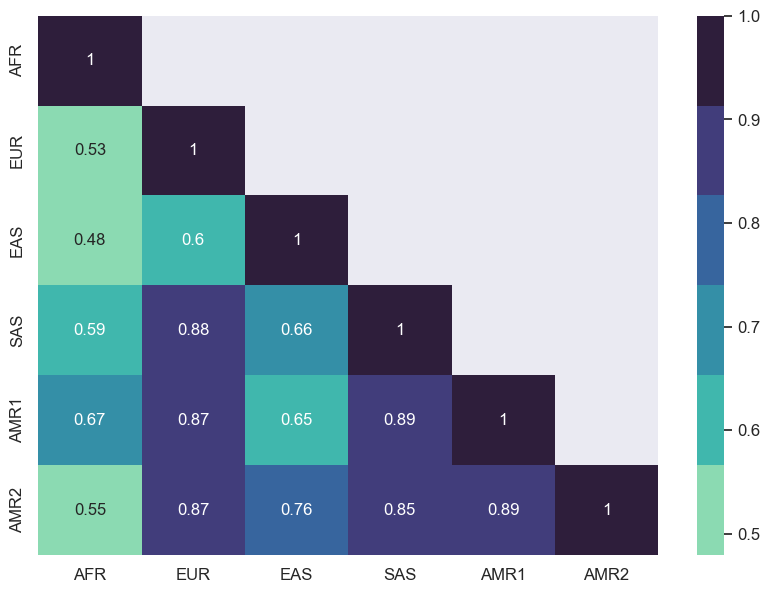

In [146]:
# Create a mask to remove the upper half of the correlation matrix, as it is simply a reflection of the lower half of the matrix
mask = np.triu(np.ones_like(frequency_correlation_matrix, dtype=bool))
np.fill_diagonal(mask, False)

# Construct a heatmap to visualise the correlation matrix. Apply the mask.
sns.heatmap(frequency_correlation_matrix, annot=True, mask=mask, cmap=sns.color_palette("mako_r"))

plt.savefig(
    "..\Results\Figures\Variant_frequency_correlation_plot_AFR_vs_GLOBAL.png",
    dpi=1200,
    bbox_inches="tight",
)

plt.show()

### Determine if frequency differences are significant

Select allele count data for the analysis

In [147]:
ih_alfa_comparisons = ih_alfa_data[
    [
        "ID",
        "VAR_NAME",
        "REF",
        "ALT",
        "POS",
        "GENE",
        "ALT_CT_IH_Recent African",
        "REF_CT_IH_Recent African",
        "ALT_CT_ALFA_Latin American 1",
        "REF_CT_ALFA_Latin American 1",
        "ALT_CT_ALFA_Latin American 2",
        "REF_CT_ALFA_Latin American 2",
        "ALT_CT_ALFA_East Asian",
        "REF_CT_ALFA_East Asian",
        "ALT_CT_ALFA_South Asian",
        "REF_CT_ALFA_South Asian",
        "ALT_CT_ALFA_European",
        "REF_CT_ALFA_European",
    ]
]

ih_alfa_comparisons.head(5)

,ID,VAR_NAME,REF,ALT,POS,GENE,ALT_CT_IH_Recent African,REF_CT_IH_Recent African,ALT_CT_ALFA_Latin American 1,REF_CT_ALFA_Latin American 1,ALT_CT_ALFA_Latin American 2,REF_CT_ALFA_Latin American 2,ALT_CT_ALFA_East Asian,REF_CT_ALFA_East Asian,ALT_CT_ALFA_South Asian,REF_CT_ALFA_South Asian,ALT_CT_ALFA_European,REF_CT_ALFA_European
0,34452510_C_T,rs1000343,C,T,34452510,CAT,95,1125,5.0,673.0,10.0,2200.0,0.0,490.0,0.0,184.0,49.0,109377.0
1,110174956_T_C,rs1000989,T,C,110174956,COL4A1,320,900,123.0,273.0,1330.0,2052.0,55.0,109.0,1685.0,3283.0,21489.0,37269.0
2,110174971_T_C,rs1000990,T,C,110174971,COL4A1,317,903,40.0,106.0,261.0,349.0,32.0,54.0,36.0,62.0,5355.0,8931.0
3,33026408_C_T,rs1005573,C,T,33026408,OLIG2,1061,159,209.0,87.0,1810.0,956.0,35.0,69.0,79.0,31.0,10693.0,4955.0
4,150998920_A_G,rs1007311,A,G,150998920,NOS3,691,529,61.0,85.0,154.0,456.0,56.0,56.0,43.0,55.0,9154.0,11242.0


Remove rows with variant alternate allele counts of 0. We only want to include variants that are present in all comparison populations.

In [148]:
ih_alfa_comparisons = ih_alfa_comparisons[
    (ih_alfa_comparisons["ALT_CT_IH_Recent African"] != 0)
    & (ih_alfa_comparisons["ALT_CT_ALFA_Latin American 1"] != 0)
    & (ih_alfa_comparisons["ALT_CT_ALFA_Latin American 2"] != 0)
    & (ih_alfa_comparisons["ALT_CT_ALFA_European"] != 0)
    & (ih_alfa_comparisons["ALT_CT_ALFA_East Asian"] != 0)
    & (ih_alfa_comparisons["ALT_CT_ALFA_South Asian"] != 0)
]

In [149]:
# Save results

ih_alfa_comparisons.to_csv(
    os.path.join(
        PROJECT_ROOT,
        "Results",
        "Tables",
        "Allele_counts_for_Fishers.csv",
    ),
    index=False,
)

Perform a two-tailed Fisher's Exact Test to determine if population differences in allele frequencies for variants are statistically significant 

In [150]:
# Generate comparison population combinations

comp_populations = [
    ("IH_Recent African", "ALFA_East Asian"),
    ("IH_Recent African", "ALFA_South Asian"),
    ("IH_Recent African", "ALFA_European"),
    ("IH_Recent African", "ALFA_Latin American 1"),
    ("IH_Recent African", "ALFA_Latin American 2"),
]

In [151]:
# Calculate fisher's exact odds ratios and p-values for each variant for the different population combination

fishers_results = functions.fishers_test(
    ih_alfa_comparisons.replace(np.NAN, 0), comp_populations
)
fishers_results.head(5)

,ID,VAR_NAME,REF,ALT,GENE,POS,PVALUE_IH_Recent African_ALFA_East Asian,OR_IH_Recent African_ALFA_East Asian,PVALUE_IH_Recent African_ALFA_South Asian,OR_IH_Recent African_ALFA_South Asian,PVALUE_IH_Recent African_ALFA_European,OR_IH_Recent African_ALFA_European,PVALUE_IH_Recent African_ALFA_Latin American 1,OR_IH_Recent African_ALFA_Latin American 1,PVALUE_IH_Recent African_ALFA_Latin American 2,OR_IH_Recent African_ALFA_Latin American 2
0,110174956_T_C,rs1000989,T,C,COL4A1,110174956,4.994184e-02,0.704646,2.047839e-07,0.692753,2.877260e-14,0.616650,6.936673e-02,0.789160,1.252062e-16,0.548571
0,110174971_T_C,rs1000990,T,C,COL4A1,110174971,3.130879e-02,0.592400,2.422944e-02,0.604590,2.934688e-16,0.585480,6.914875e-01,0.930288,6.839954e-13,0.469414
0,33026408_C_T,rs1005573,C,T,OLIG2,33026408,6.040086e-32,13.155256,8.363288e-05,2.618502,1.570940e-48,3.092163,1.168116e-10,2.777738,2.324018e-48,3.524501
0,150998920_A_G,rs1007311,A,G,NOS3,150998920,1.960058e-01,1.306238,1.520092e-02,1.670770,1.369937e-15,1.604187,7.848065e-04,1.820168,5.575761e-38,3.867822
0,151008522_T_C,rs1008140,T,C,NOS3,151008522,3.781790e-03,2.065817,2.852421e-11,33.348195,1.870364e-181,14.235735,4.673196e-07,3.836518,1.382575e-43,15.595786


In [152]:
# Save results

fishers_results.to_csv(
    os.path.join(
        PROJECT_ROOT,
        "Results",
        "Tables",
        "Fishers_results_not_corrected.csv",
    ),
    index=False,
)

Since multiple Fisher's Tests were performed, the results need to be corrected for multiple testing. Perform this correction using the Bonferroni method.

In [153]:
# Generate a list with column names for all subpopulation p-values in the fishers_results dataframe
p_value_combinations_list = []
for combination in comp_populations:
    first_pop = combination[0]
    second_pop = combination[1]
    p_value_combinations = "PVALUE_{}_{}".format(first_pop, second_pop)
    p_value_combinations_list.append(p_value_combinations)

# Correct for multiple testing for the entire dataset
multipletests_results = functions.multipletest_correction_wholedf(
    fishers_results, p_value_combinations_list, 0.05, "bonferroni"
)

multipletests_results.head(5)

variable,ID,VAR_NAME,REF,ALT,PVALUE_IH_Recent African_ALFA_East Asian,PVALUE_IH_Recent African_ALFA_European,PVALUE_IH_Recent African_ALFA_Latin American 1,PVALUE_IH_Recent African_ALFA_Latin American 2,PVALUE_IH_Recent African_ALFA_South Asian
0,110149776_G_T,rs13260,G,T,1.684983e-47,2.747798e-65,7.827485e-09,1.0,5.477194e-10
1,110150188_C_T,rs560166628,C,T,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00
2,110150508_T_C,rs188362373,T,C,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00
3,110151306_T_TA,rs571140968,T,TA,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00
4,110151903_A_G,rs558423680,A,G,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00


In [154]:
# Save results

multipletests_results.to_csv(
    os.path.join(
        PROJECT_ROOT,
        "Results",
        "Tables",
        "Fishers_results_bonferroni_corrected.csv",
    ),
    index=False,
)

Combine the Bonferroni-corrected p-values with the rest of the Fisher's Test results, including the odds ratios. 

In [155]:
# Melt the dataframe containing the Bonferroni-corrected p-values so that this data can be combined with the the rest of the Fisher's results

pvalue_table = multipletests_results.melt(id_vars=["ID", "VAR_NAME", "REF", "ALT"]).rename(
    columns={"variable": "COMP_POPS", "value": "CORR_PVALUE"}
)
pvalue_table["COMP_POPS"] = pvalue_table["COMP_POPS"].apply(
    lambda x: str(x).replace("PVALUE_", "")
)

In [156]:
# Convert the dataframe containing the remaining Fisher's results, such as the odds ratios, into a suitable format for combination with the corrected p-values.

fishers_df_OR_columns = fishers_results.columns.str.contains("OR_*|ID|VAR_NAME|REF|ALT")
or_table = (
    fishers_results.iloc[:, fishers_df_OR_columns]
    .melt(id_vars=["ID", "VAR_NAME", "REF", "ALT"])
    .rename(columns={"variable": "COMP_POPS", "value": "OR"})
)
or_table["COMP_POPS"] = or_table["COMP_POPS"].apply(lambda x: str(x).replace("OR_", ""))

In [157]:
# Combine the corrected p-value data with the remaining Fisher's test data

pvalue_or_table = pd.merge(pvalue_table, or_table, on=["ID", "VAR_NAME", "REF", "ALT", "COMP_POPS"])
pvalue_or_table.head(5)

,ID,VAR_NAME,REF,ALT,COMP_POPS,CORR_PVALUE,OR
0,110149776_G_T,rs13260,G,T,IH_Recent African_ALFA_East Asian,1.684983e-47,90.055866
1,110150188_C_T,rs560166628,C,T,IH_Recent African_ALFA_East Asian,1.000000e+00,NaN
2,110150508_T_C,rs188362373,T,C,IH_Recent African_ALFA_East Asian,1.000000e+00,NaN
3,110151306_T_TA,rs571140968,T,TA,IH_Recent African_ALFA_East Asian,1.000000e+00,NaN
4,110151903_A_G,rs558423680,A,G,IH_Recent African_ALFA_East Asian,1.000000e+00,NaN


Format the data so that is it useable for further analysis. Start by adding in the variant allele count information that was used to conduct the Fisher's Exact Tests.

In [158]:
# Temporarily rename the REF and ALT columns
ih_alfa_data = ih_alfa_data.rename(columns={"REF": "REF_AL", "ALT": "ALT_AL"})

# Subset ALT count data and format
ih_ALFA_data_ALT_columns = ih_alfa_data.columns.str.contains(
    "ALT_CT_*|ID|VAR_NAME|REF_AL|ALT_AL"
)
alt_count_table = ih_alfa_data.iloc[:, ih_ALFA_data_ALT_columns].melt(
    id_vars=["ID", "VAR_NAME", "REF_AL", "ALT_AL"], value_name="ALT_CTS", var_name="REG"
)

# Remove unnecessary info from the comparison column
alt_count_table["REG"] = alt_count_table["REG"].apply(
    lambda x: str(x).replace("ALT_CT_", "")
)

# Subset REF count data and format
ih_ALFA_data_REF_columns = ih_alfa_data.columns.str.contains(
    "REF_CT_*|ID|VAR_NAME|REF_AL|ALT_AL"
)
ref_count_table = ih_alfa_data.iloc[:, ih_ALFA_data_REF_columns].melt(
    id_vars=["ID", "VAR_NAME", "REF_AL", "ALT_AL"], value_name="REF_CTS", var_name="REG"
)

# Remove unnecessary info from the comparison column
ref_count_table["REG"] = alt_count_table["REG"].apply(
    lambda x: str(x).replace("REF_CT_", "")
)

# Combine formatted alt and ref count data
count_table = pd.merge(
    alt_count_table, ref_count_table, on=["ID", "VAR_NAME", "REF_AL", "ALT_AL", "REG"]
).rename(columns={"REF_AL": "REF", "ALT_AL": "ALT"})
count_table.head(5)

,ID,VAR_NAME,REF,ALT,REG,ALT_CTS,REF_CTS
0,34452510_C_T,rs1000343,C,T,IH_CA,1.0,67.0
1,110174956_T_C,rs1000989,T,C,IH_CA,25.0,43.0
2,110174971_T_C,rs1000990,T,C,IH_CA,25.0,43.0
3,33026408_C_T,rs1005573,C,T,IH_CA,60.0,8.0
4,150998920_A_G,rs1007311,A,G,IH_CA,21.0,47.0


Refine the dataset by retaining only the rows with significant p-values. Then, merge the significant p-value, odds ratio, and allele count data. Finally, compute the variant alternate allele frequencies.

In [159]:
# Filter p-value and odds ratio table by significant p-values

sign_pvalue_or_table = pvalue_or_table[pvalue_or_table.CORR_PVALUE < 0.05]

# Add empty count columns to p-value and odds ratio table
sign_pvalue_or_table.loc[:, "POP1_REF_CTS"] = ""
sign_pvalue_or_table.loc[:, "POP1_ALT_CTS"] = ""
sign_pvalue_or_table.loc[:, "POP2_REF_CTS"] = ""
sign_pvalue_or_table.loc[:, "POP2_ALT_CTS"] = ""

# Iterate over row in p-value and odds ratio table and append count data
for index, row in sign_pvalue_or_table.iterrows():
    # Extract variant ID, ref allele and alt allele information
    id = row["ID"]
    ref = row["REF"]
    alt = row["ALT"]

    # Split comparison population column into the two comparison populations
    comp_pops = row["COMP_POPS"]
    split_pops = comp_pops.split("_", 2)
    split_pops = ["_".join(split_pops[0:2])] + split_pops[2:]
    comp_pop1 = split_pops[0]
    comp_pop2 = split_pops[1]

    # Fetch row in count table with information for each comparison population
    pop1_count_table_row = count_table.loc[
        (count_table.ID == id)
        & (count_table.REF == ref)
        & (count_table.ALT == alt)
        & (count_table.REG == comp_pop1)
    ]
    pop2_count_table_row = count_table.loc[
        (count_table.ID == id)
        & (count_table.REF == ref)
        & (count_table.ALT == alt)
        & (count_table.REG == comp_pop2)
    ]

    # Extract ref and alt count information for relevant comparison population
    pop1_ref = pop1_count_table_row["REF_CTS"].values
    pop1_alt = pop1_count_table_row["ALT_CTS"].values
    pop2_ref = pop2_count_table_row["REF_CTS"].values
    pop2_alt = pop2_count_table_row["ALT_CTS"].values

    # Append ref and alt count information to p-value and odds ratio table
    sign_pvalue_or_table.at[index, "POP1_REF_CTS"] = pop1_ref
    sign_pvalue_or_table.at[index, "POP1_ALT_CTS"] = pop1_alt
    sign_pvalue_or_table.at[index, "POP2_REF_CTS"] = pop2_ref
    sign_pvalue_or_table.at[index, "POP2_ALT_CTS"] = pop2_alt

# # Change count data format from list to float
sign_pvalue_or_table["POP1_REF_CTS"] = sign_pvalue_or_table["POP1_REF_CTS"].str[0]
sign_pvalue_or_table["POP1_ALT_CTS"] = sign_pvalue_or_table["POP1_ALT_CTS"].str[0]
sign_pvalue_or_table["POP2_REF_CTS"] = sign_pvalue_or_table["POP2_REF_CTS"].str[0]
sign_pvalue_or_table["POP2_ALT_CTS"] = sign_pvalue_or_table["POP2_ALT_CTS"].str[0]

# Calculate alt allele frequencies and append results to table
sign_pvalue_or_table["POP1_ALT_FREQ"] = sign_pvalue_or_table["POP1_ALT_CTS"].astype(
    float
) / (
    sign_pvalue_or_table["POP1_ALT_CTS"].astype(float)
    + sign_pvalue_or_table["POP1_REF_CTS"].astype(float)
)
sign_pvalue_or_table["POP2_ALT_FREQ"] = sign_pvalue_or_table["POP2_ALT_CTS"].astype(
    float
) / (
    sign_pvalue_or_table["POP2_ALT_CTS"].astype(float)
    + sign_pvalue_or_table["POP2_REF_CTS"].astype(float)
)

sign_pvalue_or_table.head(5)

,ID,VAR_NAME,REF,ALT,COMP_POPS,CORR_PVALUE,OR,POP1_REF_CTS,POP1_ALT_CTS,POP2_REF_CTS,POP2_ALT_CTS,POP1_ALT_FREQ,POP2_ALT_FREQ
0,110149776_G_T,rs13260,G,T,IH_Recent African_ALFA_East Asian,1.684983e-47,90.055866,895.0,325.0,496.0,2.0,0.266393,0.004016
10,110154143_G_A,rs1192201,G,A,IH_Recent African_ALFA_East Asian,1.514673e-18,4.494393,75.0,1145.0,126.0,428.0,0.938525,0.772563
11,110154177_A_C,rs1192202,A,C,IH_Recent African_ALFA_East Asian,2.053587e-16,4.383810,98.0,1122.0,103.0,269.0,0.919672,0.723118
12,110154208_T_A,rs3825485,T,A,IH_Recent African_ALFA_East Asian,1.432372e-12,0.004219,1219.0,1.0,72.0,14.0,0.000820,0.162791
17,110154505_T_C,rs3825481,T,C,IH_Recent African_ALFA_East Asian,2.165456e-58,0.003045,1219.0,1.0,438.0,118.0,0.000820,0.212230


In [160]:
# Save the formatted Bonferroni-corrected Fisher's Test results

sign_pvalue_or_table.to_csv(
    os.path.join(
        PROJECT_ROOT,
        "Results",
        "Tables",
        "Significant_Fishers_results_bonferroni_corrected.csv",
    ),
    index=False,
)

Calculate the number of variants with significant frequency differences for each comparison population group

In [161]:
IH_Afr_ALFA_Eur_significant = multipletests_results[
    multipletests_results["PVALUE_IH_Recent African_ALFA_European"] < 0.05
]["PVALUE_IH_Recent African_ALFA_European"].count()
IH_Afr_ALFA_Eur_notsignificant = (
    multipletests_results["PVALUE_IH_Recent African_ALFA_European"].count()
    - IH_Afr_ALFA_Eur_significant
)

IH_Afr_ALFA_Eas_significant = multipletests_results[
    multipletests_results["PVALUE_IH_Recent African_ALFA_East Asian"] < 0.05
]["PVALUE_IH_Recent African_ALFA_East Asian"].count()
IH_Afr_ALFA_Eas_notsignificant = (
    multipletests_results["PVALUE_IH_Recent African_ALFA_East Asian"].count()
    - IH_Afr_ALFA_Eas_significant
)

IH_Afr_ALFA_Sas_significant = multipletests_results[
    multipletests_results["PVALUE_IH_Recent African_ALFA_South Asian"] < 0.05
]["PVALUE_IH_Recent African_ALFA_South Asian"].count()
IH_Afr_ALFA_Sas_notsignificant = (
    multipletests_results["PVALUE_IH_Recent African_ALFA_South Asian"].count()
    - IH_Afr_ALFA_Sas_significant
)

IH_Afr_ALFA_Amr1_significant = multipletests_results[
    multipletests_results["PVALUE_IH_Recent African_ALFA_Latin American 1"] < 0.05
]["PVALUE_IH_Recent African_ALFA_Latin American 1"].count()
IH_Afr_ALFA_Amr1_notsignificant = (
    multipletests_results["PVALUE_IH_Recent African_ALFA_Latin American 1"].count()
    - IH_Afr_ALFA_Amr1_significant
)

IH_Afr_ALFA_Amr2_significant = multipletests_results[
    multipletests_results["PVALUE_IH_Recent African_ALFA_Latin American 2"] < 0.05
]["PVALUE_IH_Recent African_ALFA_Latin American 2"].count()
IH_Afr_ALFA_Amr2_notsignificant = (
    multipletests_results["PVALUE_IH_Recent African_ALFA_Latin American 2"].count()
    - IH_Afr_ALFA_Amr2_significant
)

Construct a dataframe to house the above information. Calculate the percentage significant variants for each comparison population group.

In [162]:
Significant_freq_differences = pd.DataFrame(
    {
        "Significant": [
            IH_Afr_ALFA_Eur_significant,
            IH_Afr_ALFA_Eas_significant,
            IH_Afr_ALFA_Sas_significant,
            IH_Afr_ALFA_Amr1_significant,
            IH_Afr_ALFA_Amr2_significant,
        ],
        "Not significant": [
            IH_Afr_ALFA_Eur_notsignificant,
            IH_Afr_ALFA_Eas_notsignificant,
            IH_Afr_ALFA_Sas_notsignificant,
            IH_Afr_ALFA_Amr1_notsignificant,
            IH_Afr_ALFA_Amr2_notsignificant,
        ],
    },
    index=[
        "IH Africa vs ALFA Europe",
        "IH Africa vs ALFA East Asia",
        "IH Africa vs ALFA South Asia",
        "IH Africa vs ALFA Latin America 1",
        "IH Africa vs ALFA Latin America 2",
    ],
)

Significant_freq_differences["Percentage significant"] = (
    Significant_freq_differences["Significant"]
    / (
        Significant_freq_differences["Significant"]
        + Significant_freq_differences["Not significant"]
    )
) * 100

Significant_freq_differences.head(5)

,Significant,Not significant,Percentage significant
IH Africa vs ALFA Europe,864,1130,43.329990
IH Africa vs ALFA East Asia,509,1485,25.526580
IH Africa vs ALFA South Asia,420,1574,21.063190
IH Africa vs ALFA Latin America 1,407,1587,20.411234
IH Africa vs ALFA Latin America 2,728,1266,36.509529


Construct a horizontal bar plot to visualise the number of variants with significant frequency differences for each comparison population group

In [163]:
# Set plot figure size
sns.set(rc={"figure.figsize": (7, 2)})

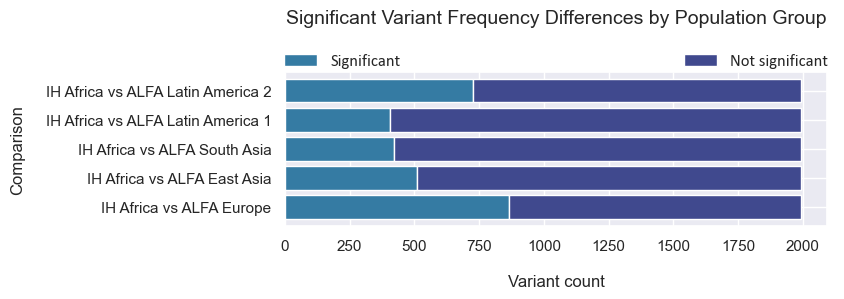

In [164]:
# Construct horizontal bar plot

ax = Significant_freq_differences[["Significant", "Not significant"]].plot(
    kind="barh", stacked=True, width=0.8, color=["#357BA3", "#40498E"]
)

# Rotate xticks

plt.xticks(rotation=0)

# Set x and y labels

plt.xlabel("Variant count", labelpad=15)
plt.ylabel("Comparison", labelpad=15)

# Add legend to plot

legend = plt.legend(
    loc="center",
    frameon=False,
    bbox_to_anchor=(0.0, 1.02, 1.0, 0.102),
    mode="expand",
    ncol=2,
    borderaxespad=-0.46,
    prop={"size": 12, "family": "Calibri"},
)

# Set plot title

plt.title(
    "Significant Variant Frequency Differences by Population Group",
    size=constants.BIGGER_FONT,
    pad=35,
    loc="center",
)

plt.savefig(
    "..\Results\Figures\Significant_freq_differences_Afr_vs_global.png",
    dpi=600,
    bbox_inches="tight",
)
plt.show()

### Have any of the genetic variants detected in African populations previously been associated with HIE? 

Make a list with rsID information of variants that have been associated with HIE. This information was manually retrieved from: https://doi.org/10.1016/j.ygeno.2022.110508.

In [165]:
hie_variant_rsids = [
    "rs2067853",
    "rs1217401",
    "rs2043211",
    "rs1001179",
    "rs1961495",
    "rs1411040",
    "rs34004222",
    "rs13027659",
    "rs190148408",
    "rs79704487",
    "rs1800896",
    "rs3024490",
    "rs1800871",
    "rs1554286",
    "rs1518111",
    "rs1143623",
    "rs16944",
    "rs1071676",
    "rs1800795",
    "rs2069837",
    "rs1800796",
    "rs2066992",
    "rs2069832",
    "rs2069833",
    "rs1554606",
    "rs2069845",
    "rs1801133",
    "rs4846049",
    "rs1476413",
    "rs1801131",
    "rs9651118",
    "rs1808593",
    "rs2070744",
    "rs1800779",
    "rs6517135",
    "rs1799964",
    "rs1799724",
    "rs361525",
    "rs1800629",
]

How many HIE variants are there with rsIDs?

In [166]:
len(hie_variant_rsids)

39

Determine which of these HIE variants are present in the in-house African and ALFA global variant frequency data.

In [167]:
ih_alfa_frequencies_hie = (
    ih_alfa_frequencies[ih_alfa_frequencies["VAR_NAME"].isin(hie_variant_rsids)]
    .reset_index(drop=True)
)

freqs_list = ih_alfa_frequencies_hie["VAR_NAME"].unique().tolist()

freqs_list

['rs1071676',
 'rs1217401',
 'rs1411040',
 'rs1476413',
 'rs1518111',
 'rs1554286',
 'rs1554606',
 'rs1800779',
 'rs1800795',
 'rs1800796',
 'rs1800871',
 'rs1800896',
 'rs1801131',
 'rs1801133',
 'rs1808593',
 'rs1961495',
 'rs2043211',
 'rs2066992',
 'rs2067853',
 'rs2069832',
 'rs2069837',
 'rs2069845',
 'rs2070744',
 'rs3024490',
 'rs4846049']

In [168]:
ih_alfa_frequencies_hie.head(5)

,ID,VAR_NAME,POS,REF,ALT,GENE,IH_Recent African_ALT_AF,ALFA_Latin American 1_ALT_AF,ALFA_Latin American 2_ALT_AF,ALFA_East Asian_ALT_AF,ALFA_South Asian_ALT_AF,ALFA_European_ALT_AF
0,112829856_C_G,rs1071676,112829856,C,G,IL1B,0.141803,0.178082,0.142623,0.034884,0.132653,0.236899
1,113896329_A_G,rs1217401,113896329,A,G,AP4B1,0.797541,0.419217,0.192529,0.057899,0.327415,0.321924
2,110291574_C_T,rs1411040,110291574,C,T,COL4A1,0.815574,0.862179,0.803546,0.937500,0.718182,0.843280
3,11792243_C_T,rs1476413,11792243,C,T,MTHFR,0.141803,0.218695,0.159236,0.199875,0.412103,0.268016
4,206771300_T_C,rs1518111,206771300,T,C,IL10,0.555738,0.734914,0.661386,0.295049,0.603571,0.784843


### Visualise differences in allele frequency between populations for HIE-associated variants

Change the population alternate allele frequency column names in preparation for plotting

In [169]:
replacements = {"IH_Recent": "IH ", "_ALT_AF": "", "ALFA_": "ALFA "}

for key, value in replacements.items():
    ih_alfa_frequencies_hie.columns = ih_alfa_frequencies_hie.columns.str.replace(
        key, value
    )

ih_alfa_frequencies_hie.head(5)

,ID,VAR_NAME,POS,REF,ALT,GENE,IH African,ALFA Latin American 1,ALFA Latin American 2,ALFA East Asian,ALFA South Asian,ALFA European
0,112829856_C_G,rs1071676,112829856,C,G,IL1B,0.141803,0.178082,0.142623,0.034884,0.132653,0.236899
1,113896329_A_G,rs1217401,113896329,A,G,AP4B1,0.797541,0.419217,0.192529,0.057899,0.327415,0.321924
2,110291574_C_T,rs1411040,110291574,C,T,COL4A1,0.815574,0.862179,0.803546,0.937500,0.718182,0.843280
3,11792243_C_T,rs1476413,11792243,C,T,MTHFR,0.141803,0.218695,0.159236,0.199875,0.412103,0.268016
4,206771300_T_C,rs1518111,206771300,T,C,IL10,0.555738,0.734914,0.661386,0.295049,0.603571,0.784843


Change the format of data in preparation for plotting.

In [170]:
# Melt data

heatmap_data = ih_alfa_frequencies_hie.melt(
    id_vars=["VAR_NAME", "POS", "REF", "ALT", "GENE"],
    value_vars=ih_alfa_frequencies_hie.iloc[:, 2:],
    var_name="POPULATION",
    value_name="ALT_AF",
)

heatmap_data.head(5)

,VAR_NAME,POS,REF,ALT,GENE,POPULATION,ALT_AF
0,rs1071676,112829856,C,G,IL1B,IH African,0.141803
1,rs1217401,113896329,A,G,AP4B1,IH African,0.797541
2,rs1411040,110291574,C,T,COL4A1,IH African,0.815574
3,rs1476413,11792243,C,T,MTHFR,IH African,0.141803
4,rs1518111,206771300,T,C,IL10,IH African,0.555738


In [171]:
# Pivot data

heatmap_data_pivot = heatmap_data.pivot(
    index="POPULATION", columns="VAR_NAME", values="ALT_AF"
).replace(np.NaN, 0.0)

heatmap_data_pivot.head(5)

VAR_NAME,rs1071676,rs1217401,rs1411040,rs1476413,rs1518111,rs1554286,rs1554606,rs1800779,rs1800795,rs1800796,...,rs1961495,rs2043211,rs2066992,rs2067853,rs2069832,rs2069837,rs2069845,rs2070744,rs3024490,rs4846049
POPULATION,,,,,,,,,,,,,,,,,,,,,
ALFA East Asian,0.034884,0.057899,0.937500,0.199875,0.295049,0.278947,0.989407,0.903846,1.000000,0.674419,...,0.304878,0.455344,0.747368,0.100386,0.995984,0.156015,0.988636,0.906250,0.177966,0.789634
ALFA European,0.236899,0.321924,0.843280,0.268016,0.784843,0.817239,0.566395,0.626175,0.559989,0.050165,...,0.111394,0.323412,0.054238,0.318220,0.600349,0.077174,0.539107,0.626583,0.756379,0.665869
ALFA Latin American 1,0.178082,0.419217,0.862179,0.218695,0.734914,0.767500,0.601695,0.658824,0.828767,0.123288,...,0.128114,0.293671,0.117647,0.230088,0.722074,0.074689,0.759740,0.650685,0.682171,0.617647
ALFA Latin American 2,0.142623,0.192529,0.803546,0.159236,0.661386,0.665487,0.759540,0.758197,0.819672,0.263934,...,0.238584,0.287526,0.284698,0.151835,0.848925,0.053135,0.728896,0.742623,0.605226,0.806549
ALFA South Asian,0.132653,0.327415,0.718182,0.412103,0.603571,0.656389,0.752827,0.771930,0.857143,0.397959,...,0.222892,0.346715,0.291650,0.205479,0.815217,0.157581,0.816327,0.755102,0.597751,0.500000


Set plot parameters

In [172]:
# Set plot figure size
sns.set(rc={"figure.figsize": (12, 6)})

Plot the allele frequencies for the HIE-associated variants as a heatmap

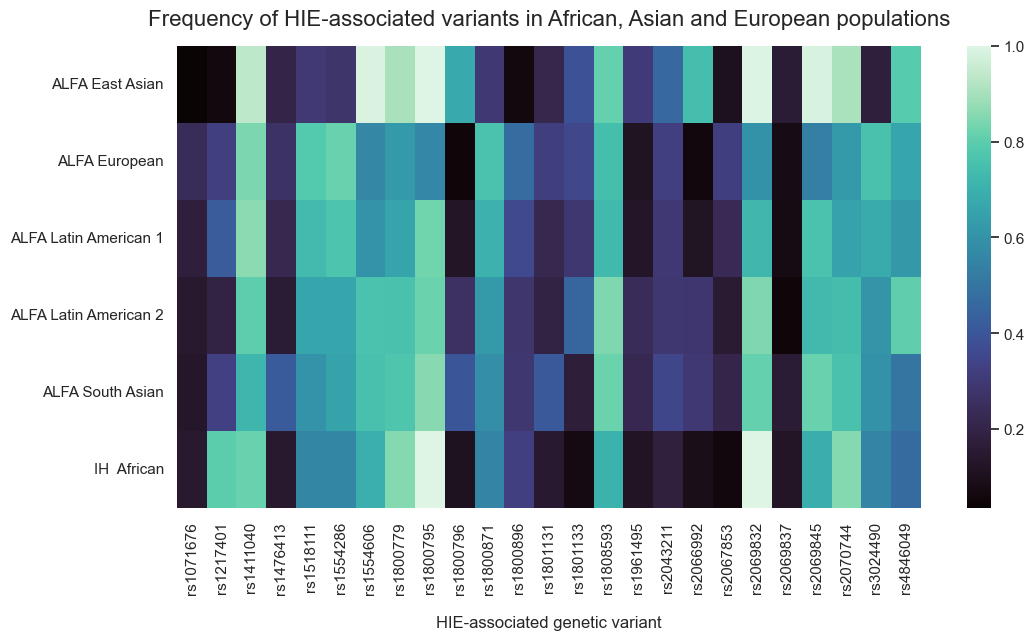

In [173]:
sns.heatmap(heatmap_data_pivot, cmap="mako")

plt.xlabel("HIE-associated genetic variant", labelpad=15)
plt.ylabel(None)
plt.title(
    "Frequency of HIE-associated variants in African, Asian and European populations",
    size=constants.LARGEST_FONT,
    pad=15,
)

plt.savefig(
    "..\Results\Figures\HIE_variant_frequency_comparisons.png",
    dpi=1200,
    bbox_inches="tight",
)
plt.show()

### Are the differences in frequency between the in-house African population and Europeans/Asians for HIE-associated variants statistically significant?

Extract data on HIE-associated variants with significant differences in frequency between Africa and Europeans/Asians, if the data is present.

In [174]:
ih_alfa_frequencies_sign_hie = (
    sign_pvalue_or_table[sign_pvalue_or_table["VAR_NAME"].isin(hie_variant_rsids)]
    .reset_index(drop=True)
)

ih_alfa_frequencies_sign_hie.head(5)


,ID,VAR_NAME,REF,ALT,COMP_POPS,CORR_PVALUE,OR,POP1_REF_CTS,POP1_ALT_CTS,POP2_REF_CTS,POP2_ALT_CTS,POP1_ALT_FREQ,POP2_ALT_FREQ
0,110229026_C_T,rs1961495,C,T,IH_Recent African_ALFA_East Asian,7.672412e-05,0.312358,1073.0,147.0,114.0,50.0,0.120492,0.304878
1,113896329_A_G,rs1217401,A,G,IH_Recent African_ALFA_East Asian,0.000000e+00,64.097764,247.0,973.0,4735.0,291.0,0.797541,0.057899
2,11790308_T_G,rs4846049,T,G,IH_Recent African_ALFA_East Asian,1.283587e-22,0.232852,651.0,569.0,69.0,259.0,0.466393,0.789634
3,11796321_G_A,rs1801133,G,A,IH_Recent African_ALFA_East Asian,2.293745e-105,0.123497,1132.0,88.0,1954.0,1230.0,0.072131,0.386307
4,151011214_G_T,rs1808593,G,T,IH_Recent African_ALFA_East Asian,8.180643e-03,0.545946,361.0,859.0,106.0,462.0,0.704098,0.813380


Remove data on frequency comparisons between in-house African and ALFA African populations

In [175]:
ih_alfa_frequencies_sign_hie = ih_alfa_frequencies_sign_hie[ih_alfa_frequencies_sign_hie["COMP_POPS"] != "IH_Recent African_ALFA_African Others"]

Get a list of the HIE-associated variants that had significant differences in frequency between Africa and Europeans/Asians

In [176]:
sign_freqs_list = ih_alfa_frequencies_sign_hie["VAR_NAME"].unique().tolist()
sign_freqs_list

['rs1961495',
 'rs1217401',
 'rs4846049',
 'rs1801133',
 'rs1808593',
 'rs1554286',
 'rs1518111',
 'rs3024490',
 'rs1800871',
 'rs1800896',
 'rs1800796',
 'rs2066992',
 'rs1554606',
 'rs2069845',
 'rs2043211',
 'rs1071676',
 'rs1476413',
 'rs1801131',
 'rs1800779',
 'rs2070744',
 'rs1800795',
 'rs2069832',
 'rs2069837',
 'rs2067853']

Get the number of HIE-associated variants that had significant differences in frequency between Africa and Europeans/Asians

In [177]:
ih_alfa_frequencies_sign_hie["VAR_NAME"].nunique()

24

It seems that one of HIE-associated variants that was found in Africans, Europeans and Asians was not present at a significantly different frequency in Africans compared to Asians/Europeans. Which variant is this? 

In [178]:
list(set(freqs_list).difference(set(sign_freqs_list)))

['rs1411040']